<a href="https://colab.research.google.com/github/rhythm38/IT496-Introduction-to-Data-Mining-Course-Project_Group7/blob/Course-Project---1/Group7_Project1_Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**IT496: Introduction to Data Mining**

#**Course Project 1**

In [9]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
df = pd.read_csv('https://raw.githubusercontent.com/rhythm38/IT496-Introduction-to-Data-Mining-Course-Project_Group7/main/EVChargingStationUsage.csv')
df.head()

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/29/2011 20:17,PDT,7/29/2011 23:20,PDT,7/29/2011 23:20,3:03:32,1:54:03,...,-122.160309,USD,0.0,Plug Out at Vehicle,3,95124.0,3284.0,NaN,NaN,NaN
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 0:00,PDT,7/30/2011 0:02,PDT,7/30/2011 0:02,0:02:06,0:01:54,...,-122.160309,USD,0.0,Customer,4,94301.0,4169.0,NaN,NaN,NaN
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 8:16,PDT,7/30/2011 12:34,PDT,7/30/2011 12:34,4:17:32,4:17:28,...,-122.160309,USD,0.0,Plug Out at Vehicle,5,94301.0,4169.0,NaN,NaN,NaN
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 14:51,PDT,7/30/2011 16:55,PDT,7/30/2011 16:55,2:03:24,2:02:58,...,-122.160309,USD,0.0,Customer,6,94302.0,2545.0,NaN,NaN,NaN
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 18:51,PDT,7/30/2011 20:03,PDT,7/30/2011 20:03,1:11:24,0:43:54,...,-122.160309,USD,0.0,Plug Out at Vehicle,7,94043.0,3765.0,NaN,NaN,NaN


# **Exploratory Data Analysis (EDA) & Preprocessing**
Explore the dataset assigned to your team and provide:

*   A summary of the dataset (should include information columns present, attribute, types, null values, and a summary of each attribute).
*   Data Visualization, summarizing insights about the dataset through EDA.

# **Data Summary**

The Palo Alto EV Charging Station Usage Open Data provides detailed insights into electric vehicle charging station usage in Palo Alto, California. This dataset includes information on station locations, connector types, session durations, and energy consumption. It is valuable for researchers, analysts, and businesses to understand EV market trends, optimize infrastructure, and promote sustainable transportation. This data enables studies on charging behavior, predictive modeling, and infrastructure improvement, ultimately supporting green mobility initiatives and informed decision-making.

In [12]:
df.shape

(259415, 33)

In [13]:
df.columns

Index(['Station Name', 'MAC Address', 'Org Name', 'Start Date',
       'Start Time Zone', 'End Date', 'End Time Zone',
       'Transaction Date (Pacific Time)', 'Total Duration (hh:mm:ss)',
       'Charging Time (hh:mm:ss)', 'Energy (kWh)', 'GHG Savings (kg)',
       'Gasoline Savings (gallons)', 'Port Type', 'Port Number', 'Plug Type',
       'EVSE ID', 'Address 1', 'City', 'State/Province', 'Postal Code',
       'Country', 'Latitude', 'Longitude', 'Currency', 'Fee', 'Ended By',
       'Plug In Event Id', 'Driver Postal Code', 'User ID', 'County',
       'System S/N', 'Model Number'],
      dtype='object')

In [14]:
df.nunique()

Station Name                           47
MAC Address                            83
Org Name                                2
Start Date                         244798
Start Time Zone                         3
End Date                           244159
End Time Zone                           3
Transaction Date (Pacific Time)    240905
Total Duration (hh:mm:ss)           31025
Charging Time (hh:mm:ss)            22473
Energy (kWh)                       118061
GHG Savings (kg)                    15535
Gasoline Savings (gallons)           6333
Port Type                               2
Port Number                             2
Plug Type                               2
EVSE ID                                51
Address 1                              20
City                                    1
State/Province                          1
Postal Code                             3
Country                                 1
Latitude                               62
Longitude                         

In [15]:
df.isnull().sum()

Station Name                           0
MAC Address                            0
Org Name                               0
Start Date                             0
Start Time Zone                        0
End Date                               0
End Time Zone                          0
Transaction Date (Pacific Time)      209
Total Duration (hh:mm:ss)              0
Charging Time (hh:mm:ss)               0
Energy (kWh)                           0
GHG Savings (kg)                       0
Gasoline Savings (gallons)             0
Port Type                              9
Port Number                            0
Plug Type                              0
EVSE ID                            78948
Address 1                              0
City                                   0
State/Province                         0
Postal Code                            0
Country                                0
Latitude                               0
Longitude                              0
Currency        

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259415 entries, 0 to 259414
Data columns (total 33 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Station Name                     259415 non-null  object 
 1   MAC Address                      259415 non-null  object 
 2   Org Name                         259415 non-null  object 
 3   Start Date                       259415 non-null  object 
 4   Start Time Zone                  259415 non-null  object 
 5   End Date                         259415 non-null  object 
 6   End Time Zone                    259415 non-null  object 
 7   Transaction Date (Pacific Time)  259206 non-null  object 
 8   Total Duration (hh:mm:ss)        259415 non-null  object 
 9   Charging Time (hh:mm:ss)         259415 non-null  object 
 10  Energy (kWh)                     259415 non-null  float64
 11  GHG Savings (kg)                 259415 non-null  float64
 12  Ga

In [17]:
df.dtypes

Station Name                        object
MAC Address                         object
Org Name                            object
Start Date                          object
Start Time Zone                     object
End Date                            object
End Time Zone                       object
Transaction Date (Pacific Time)     object
Total Duration (hh:mm:ss)           object
Charging Time (hh:mm:ss)            object
Energy (kWh)                       float64
GHG Savings (kg)                   float64
Gasoline Savings (gallons)         float64
Port Type                           object
Port Number                          int64
Plug Type                           object
EVSE ID                            float64
Address 1                           object
City                                object
State/Province                      object
Postal Code                          int64
Country                             object
Latitude                           float64
Longitude  

In [18]:
trivial_att = ['MAC Address', 'EVSE ID', 'City', 'State/Province', 'Country', 'Plug In Event Id', 'Driver Postal Code', 'User ID', 'County', 'System S/N']
for att in trivial_att:
  del df[att]
df.columns

Index(['Station Name', 'Org Name', 'Start Date', 'Start Time Zone', 'End Date',
       'End Time Zone', 'Transaction Date (Pacific Time)',
       'Total Duration (hh:mm:ss)', 'Charging Time (hh:mm:ss)', 'Energy (kWh)',
       'GHG Savings (kg)', 'Gasoline Savings (gallons)', 'Port Type',
       'Port Number', 'Plug Type', 'Address 1', 'Postal Code', 'Latitude',
       'Longitude', 'Currency', 'Fee', 'Ended By', 'Model Number'],
      dtype='object')

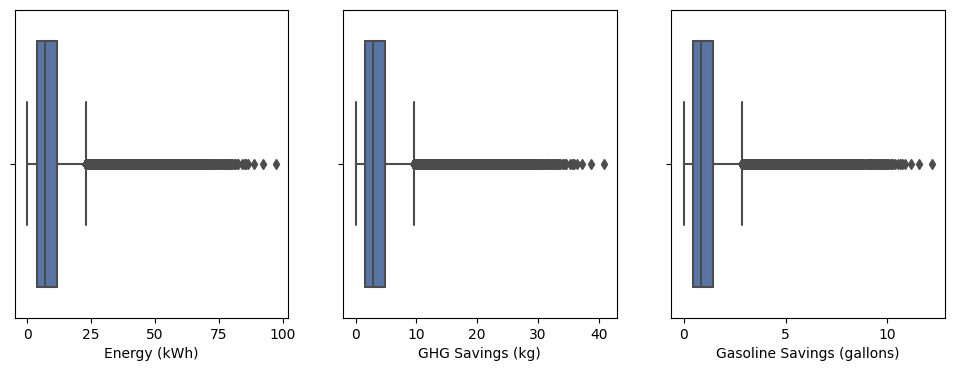

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

sns.set_theme(style="whitegrid")
for axid, col in enumerate(["Energy (kWh)", "GHG Savings (kg)", "Gasoline Savings (gallons)"]):
    sns.boxplot(x=df[col], ax=ax[axid])

<Axes: xlabel='GHG Savings (kg)', ylabel='Energy (kWh)'>

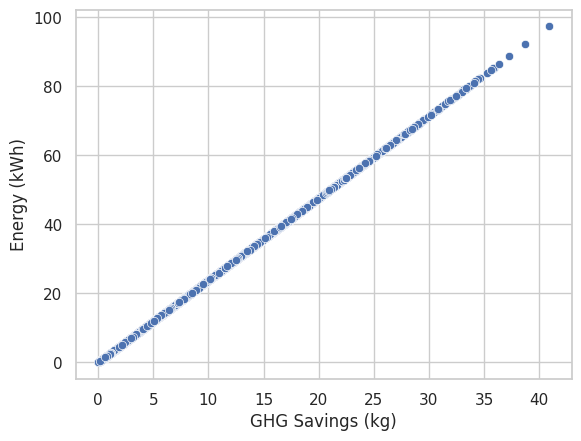

In [20]:
sns.scatterplot(x=df["GHG Savings (kg)"], y=df["Energy (kWh)"])

<Axes: xlabel='Gasoline Savings (gallons)', ylabel='Energy (kWh)'>

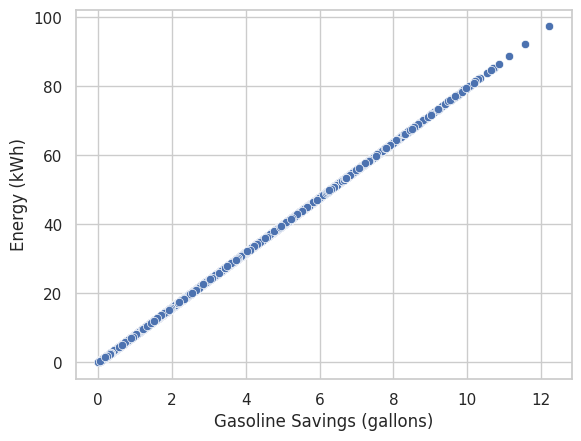

In [21]:
sns.scatterplot(x=df["Gasoline Savings (gallons)"], y=df["Energy (kWh)"])

In [22]:
model_no_dist = df["Model Number"].value_counts()
model_no_dist

CT4020-HD-GW          84886
CT4020-HD             45129
CT2100-HD-CDMA-CCR    11377
CT2000-HD-CCR         10052
CT2100-HD-CCR          8012
CT2000-HD-GW1-CCR      5737
CTHDR-S                4134
CTHCR-S                3941
CTHDR                  3623
CT4010-HD-GW           3576
Name: Model Number, dtype: int64

<Axes: ylabel='Model Number'>

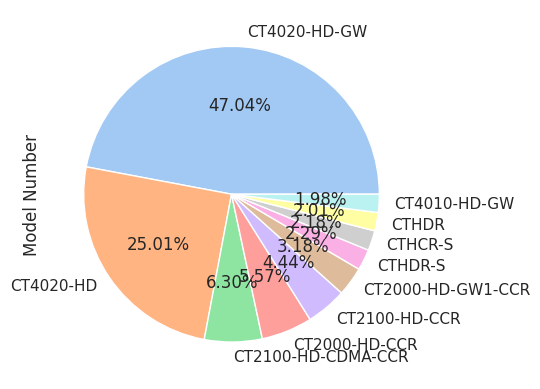

In [23]:
piec_colors = sns.color_palette('pastel')[0:len(model_no_dist)]
model_no_dist.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%')

# **Preprocessing**

The columns remaining in our dataset have very few null values, so these rows are removed.

In [24]:
columns_to_check = ['Transaction Date (Pacific Time)', 'Currency', 'Ended By', 'Port Type']
df.dropna(subset=columns_to_check, inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

(257415, 23)

In [25]:
most_frequent_category=df['Model Number'].mode()[0]
df['Model Number'].fillna(most_frequent_category, inplace=True)
df['Model Number'].isnull().sum()

0

In [26]:
df.isnull().sum()

Station Name                       0
Org Name                           0
Start Date                         0
Start Time Zone                    0
End Date                           0
End Time Zone                      0
Transaction Date (Pacific Time)    0
Total Duration (hh:mm:ss)          0
Charging Time (hh:mm:ss)           0
Energy (kWh)                       0
GHG Savings (kg)                   0
Gasoline Savings (gallons)         0
Port Type                          0
Port Number                        0
Plug Type                          0
Address 1                          0
Postal Code                        0
Latitude                           0
Longitude                          0
Currency                           0
Fee                                0
Ended By                           0
Model Number                       0
dtype: int64

**Label Encoding**

In [27]:
df['Start Date']

0          7/29/2011 20:17
1           7/30/2011 0:00
2           7/30/2011 8:16
3          7/30/2011 14:51
4          7/30/2011 18:51
                ...       
257410    12/31/2020 16:39
257411    12/31/2020 16:48
257412    12/31/2020 17:28
257413    12/31/2020 17:49
257414    12/31/2020 18:19
Name: Start Date, Length: 257415, dtype: object

In our dataset, we have date-type values. Since time is not required, we can scrap that and keep only the date.

In [28]:
for col in ['Start Date', 'End Date', 'Transaction Date (Pacific Time)']:
  df[col] = df[col].str.split(' ').str[0]

In [29]:
df['Start Date'].describe()

count        257415
unique         3444
top       7/19/2017
freq            193
Name: Start Date, dtype: object

Here we are not using lambda function for transformation of the dates, as the dates are not in the format required for strptime. We can use label encoder directly.

In [30]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for col in ['Station Name','Org Name', 'Start Time Zone', 'End Time Zone', 'Total Duration (hh:mm:ss)', 'Charging Time (hh:mm:ss)', 'Port Type', 'Plug Type', 'Address 1', 'Currency', 'Ended By', 'Model Number', 'Start Date', 'End Date', 'Transaction Date (Pacific Time)']:
  df[col] = le.fit_transform(df[col])

In [31]:
df['Start Date'].describe()

count    257415.000000
mean       1705.187200
std         986.817985
min           0.000000
25%         857.000000
50%        1704.000000
75%        2541.000000
max        3443.000000
Name: Start Date, dtype: float64

In [32]:
df.dtypes

Station Name                         int64
Org Name                             int64
Start Date                           int64
Start Time Zone                      int64
End Date                             int64
End Time Zone                        int64
Transaction Date (Pacific Time)      int64
Total Duration (hh:mm:ss)            int64
Charging Time (hh:mm:ss)             int64
Energy (kWh)                       float64
GHG Savings (kg)                   float64
Gasoline Savings (gallons)         float64
Port Type                            int64
Port Number                          int64
Plug Type                            int64
Address 1                            int64
Postal Code                          int64
Latitude                           float64
Longitude                          float64
Currency                             int64
Fee                                float64
Ended By                             int64
Model Number                         int64
dtype: obje

<Axes: >

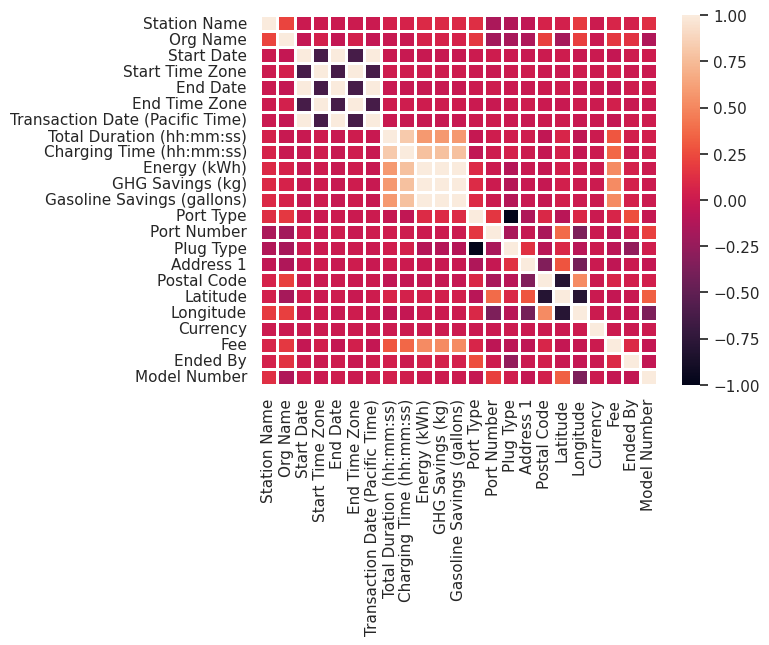

In [33]:
sns.heatmap(df.corr(), lw = 1)

# **Train-test split**

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, df["Energy (kWh)"], random_state=42, test_size=0.20)

# **Normalization**

In [35]:
size_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = size_scaler.transform(X_train)
X_test_scaled = size_scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape

((205932, 23), (51483, 23))

# **Training**

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

model_dict = {
    'LinearRegression': {"model": LinearRegression(), "params": {}},
    'RandomForestRegressor': {"model": RandomForestRegressor(random_state=42),
                              "params": {'n_estimators': list(range(5, 50, 5)), 'max_depth': list(range(1, 10, 2))}}
}

In [37]:
from sklearn.model_selection import GridSearchCV

def eval_models():
    model_results = pd.DataFrame()
    model_results['Train_RMSE'] = None
    model_results['Test_RMSE'] = None
    model_results['Train_MAE'] = None
    model_results['Test_MAE'] = None
    model_results['best_params'] = None

    best_reg_model_ours = None
    best_test_score = math.inf

    for model_name, reg_model in model_dict.items():
        classifier = GridSearchCV(reg_model['model'], reg_model['params'], n_jobs=20, verbose=1)
        classifier.fit(X_train_scaled, list(y_train))
        best_model = classifier.best_estimator_

        y_train_predicted = best_model.predict(X_train_scaled)
        train_rmse = np.sqrt(mean_squared_error(list(y_train), y_train_predicted))
        train_mae = mean_absolute_error(list(y_train), y_train_predicted)

        print(model_name, train_rmse, classifier.best_params_)

        y_predicted = best_model.predict(X_test_scaled)
        test_rmse = np.sqrt(mean_squared_error(list(y_test), y_predicted))
        test_mae = mean_absolute_error(list(y_test), y_predicted)

        if test_rmse < best_test_score:
            best_test_score = test_rmse
            best_reg_model_ours = best_model

        model_results.loc[model_name, ['Train_RMSE', 'Test_RMSE', 'Train_MAE', 'Test_MAE', 'best_params']] = [train_rmse, test_rmse, train_mae, test_mae, classifier.best_params_]

    print("Best model: ", best_model)
    y_predicted = best_model.predict(X_test_scaled)
    plt.plot(list(y_test) - y_predicted, marker='o', linestyle='')

    return model_results

Fitting 5 folds for each of 1 candidates, totalling 5 fits
LinearRegression 9.718998592816419e-15 {}
Fitting 5 folds for each of 45 candidates, totalling 225 fits
RandomForestRegressor 0.009440454941061785 {'max_depth': 9, 'n_estimators': 45}
Best model:  RandomForestRegressor(max_depth=9, n_estimators=45, random_state=42)


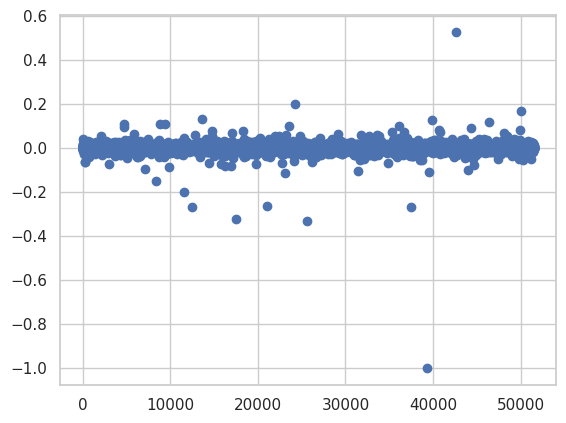

In [38]:
model_results = eval_models()